<h4 style="font-size: 18px;" align="center"><b>TEAM ID: PTID-CDS-JAN-24-1772</b></h4>
<h4 style="font-size: 16px;" align="center"><b>PROJECT ID: PRCP- 1001- RiceLeaf disease detection</b></h4>

<span style="font-size: 14px"><b>PROBLEM STATEMENT</b></span>

<ul style="font-size: 14px; line-height: 3em">
    <li>Task 1: Prepare a complete data analysis report on the given data.</li>
    <li>Task 2: Create a model which can classify the three major attacking diseases of
        rice plants like leaf blast, bacterial blight and brown spot.</li>
    <li>Task3: Analyze various techniques like Data Augmentation, etc and create a
        report on that.</li>
</ul>

<h4 style="font-size: 16px;"><b>Importing Libraries</b></h4>

In [72]:
import numpy as np # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore
import matplotlib.pyplot as plt # type: ignore

<h4 style="font-size: 16px;"><b>Some of the constants to be used in implementation.</b></h4>

In [73]:
# Constants
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 3
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATA_DIR = './data/'
TEST_DATA_DIR = './data/'

<h4 style="font-size: 16px;"><b>Perform Augmentation</b></h4>

In [74]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Scaling pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

<h4 style="font-size: 16px;"><b>Scaling the Dataset</b></h4>

In [75]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Scaling pixel values to [0, 1]

<h4 style="font-size: 16px;"><b>Training and Testing the Dataset</b></h4>

In [76]:
# Load training and test data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 119 images belonging to 3 classes.


In [77]:
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 119 images belonging to 3 classes.


<h4 style="font-size: 16px;"><b>Base model for Image Classification</b></h4>

In [78]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [79]:
# Add custom classifier on top of VGG16
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [80]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [81]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

Epoch 1/10


/Users/arunmani/miniconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 8s/step - accuracy: 0.2583 - loss: 1.2418 - val_accuracy: 0.5312 - val_loss: 1.0159
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4375 - loss: 1.0394

2024-04-24 11:05:44.067588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/arunmani/miniconda3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4375 - loss: 1.0394 - val_accuracy: 0.0000e+00 - val_loss: 1.3730
Epoch 3/10


2024-04-24 11:05:46.380862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 9s/step - accuracy: 0.3521 - loss: 1.0978 - val_accuracy: 0.5208 - val_loss: 0.9910
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.4062 - loss: 1.0739

2024-04-24 11:06:11.359966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4062 - loss: 1.0739 - val_accuracy: 0.7391 - val_loss: 0.9254
Epoch 5/10


2024-04-24 11:06:13.897744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step - accuracy: 0.6406 - loss: 0.9478 - val_accuracy: 0.6667 - val_loss: 0.9254
Epoch 6/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4348 - loss: 1.0179

2024-04-24 11:06:39.960195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4348 - loss: 1.0179 - val_accuracy: 0.4783 - val_loss: 0.9751
Epoch 7/10


2024-04-24 11:06:42.774291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.5964 - loss: 0.9146 - val_accuracy: 0.7917 - val_loss: 0.7930
Epoch 8/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.7812 - loss: 0.8121

2024-04-24 11:07:10.692295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7812 - loss: 0.8121 - val_accuracy: 0.4348 - val_loss: 1.0176
Epoch 9/10


2024-04-24 11:07:13.513626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 10s/step - accuracy: 0.7474 - loss: 0.8334 - val_accuracy: 0.8542 - val_loss: 0.7196
Epoch 10/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5938 - loss: 0.8815

2024-04-24 11:07:42.493587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5938 - loss: 0.8815 - val_accuracy: 0.5217 - val_loss: 0.9974


2024-04-24 11:07:45.627628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


<h4 style="font-size: 16px;"><b>Traning and Testing Accuracy</b></h4>
<h4 style="font-size: 16px;"><b>Traning and Testing Loss</b></h4>

In [84]:
print(f"Traning Accuracy {history.history['accuracy']}")
print(f"Traning Loss {history.history['loss']}")
print(f"Testing Accuracy {history.history['val_accuracy']}")
print(f"Testing Loss {history.history['val_loss']}")

Traning Accuracy [0.26436781883239746, 0.4375, 0.3448275923728943, 0.40625, 0.625, 0.43478259444236755, 0.6206896305084229, 0.78125, 0.7471264600753784, 0.59375]
Traning Loss [1.2578035593032837, 1.0393707752227783, 1.1054980754852295, 1.0739226341247559, 0.963812530040741, 1.0178916454315186, 0.9094459414482117, 0.8121374845504761, 0.8220972418785095, 0.8815147876739502]
Testing Accuracy [0.53125, 0.0, 0.5208333134651184, 0.739130437374115, 0.6666666865348816, 0.47826087474823, 0.7916666865348816, 0.43478259444236755, 0.8541666865348816, 0.52173912525177]
Testing Loss [1.0159481763839722, 1.3730045557022095, 0.9909533858299255, 0.9253783226013184, 0.9254302978515625, 0.9751419425010681, 0.7930116653442383, 1.0175716876983643, 0.7195615768432617, 0.997359573841095]


In [99]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)

# Print evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8532 - loss: 0.6792
Test Loss: 0.7339826226234436
Test Accuracy: 0.7815126180648804


In [100]:
# Evaluate the model on the train data
evaluation_for_training = model.evaluate(train_generator)

# Print evaluation results
print("Train Loss:", evaluation_for_training[0])
print("Train Accuracy:", evaluation_for_training[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7598 - loss: 0.7792
Train Loss: 0.7767670154571533
Train Accuracy: 0.756302535533905


<h4 style="font-size: 16px;"><b>Plot for Traning and Testing Accuracy.</b></h4>

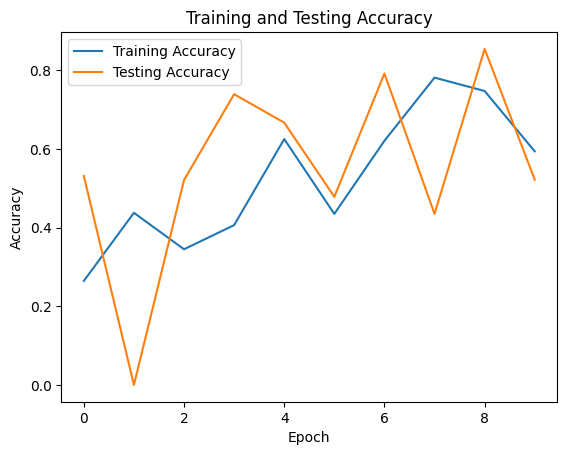

In [85]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()

<h4 style="font-size: 16px;"><b>Sample Predictions</b></h4>

In [86]:
# Sample predictions
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [87]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

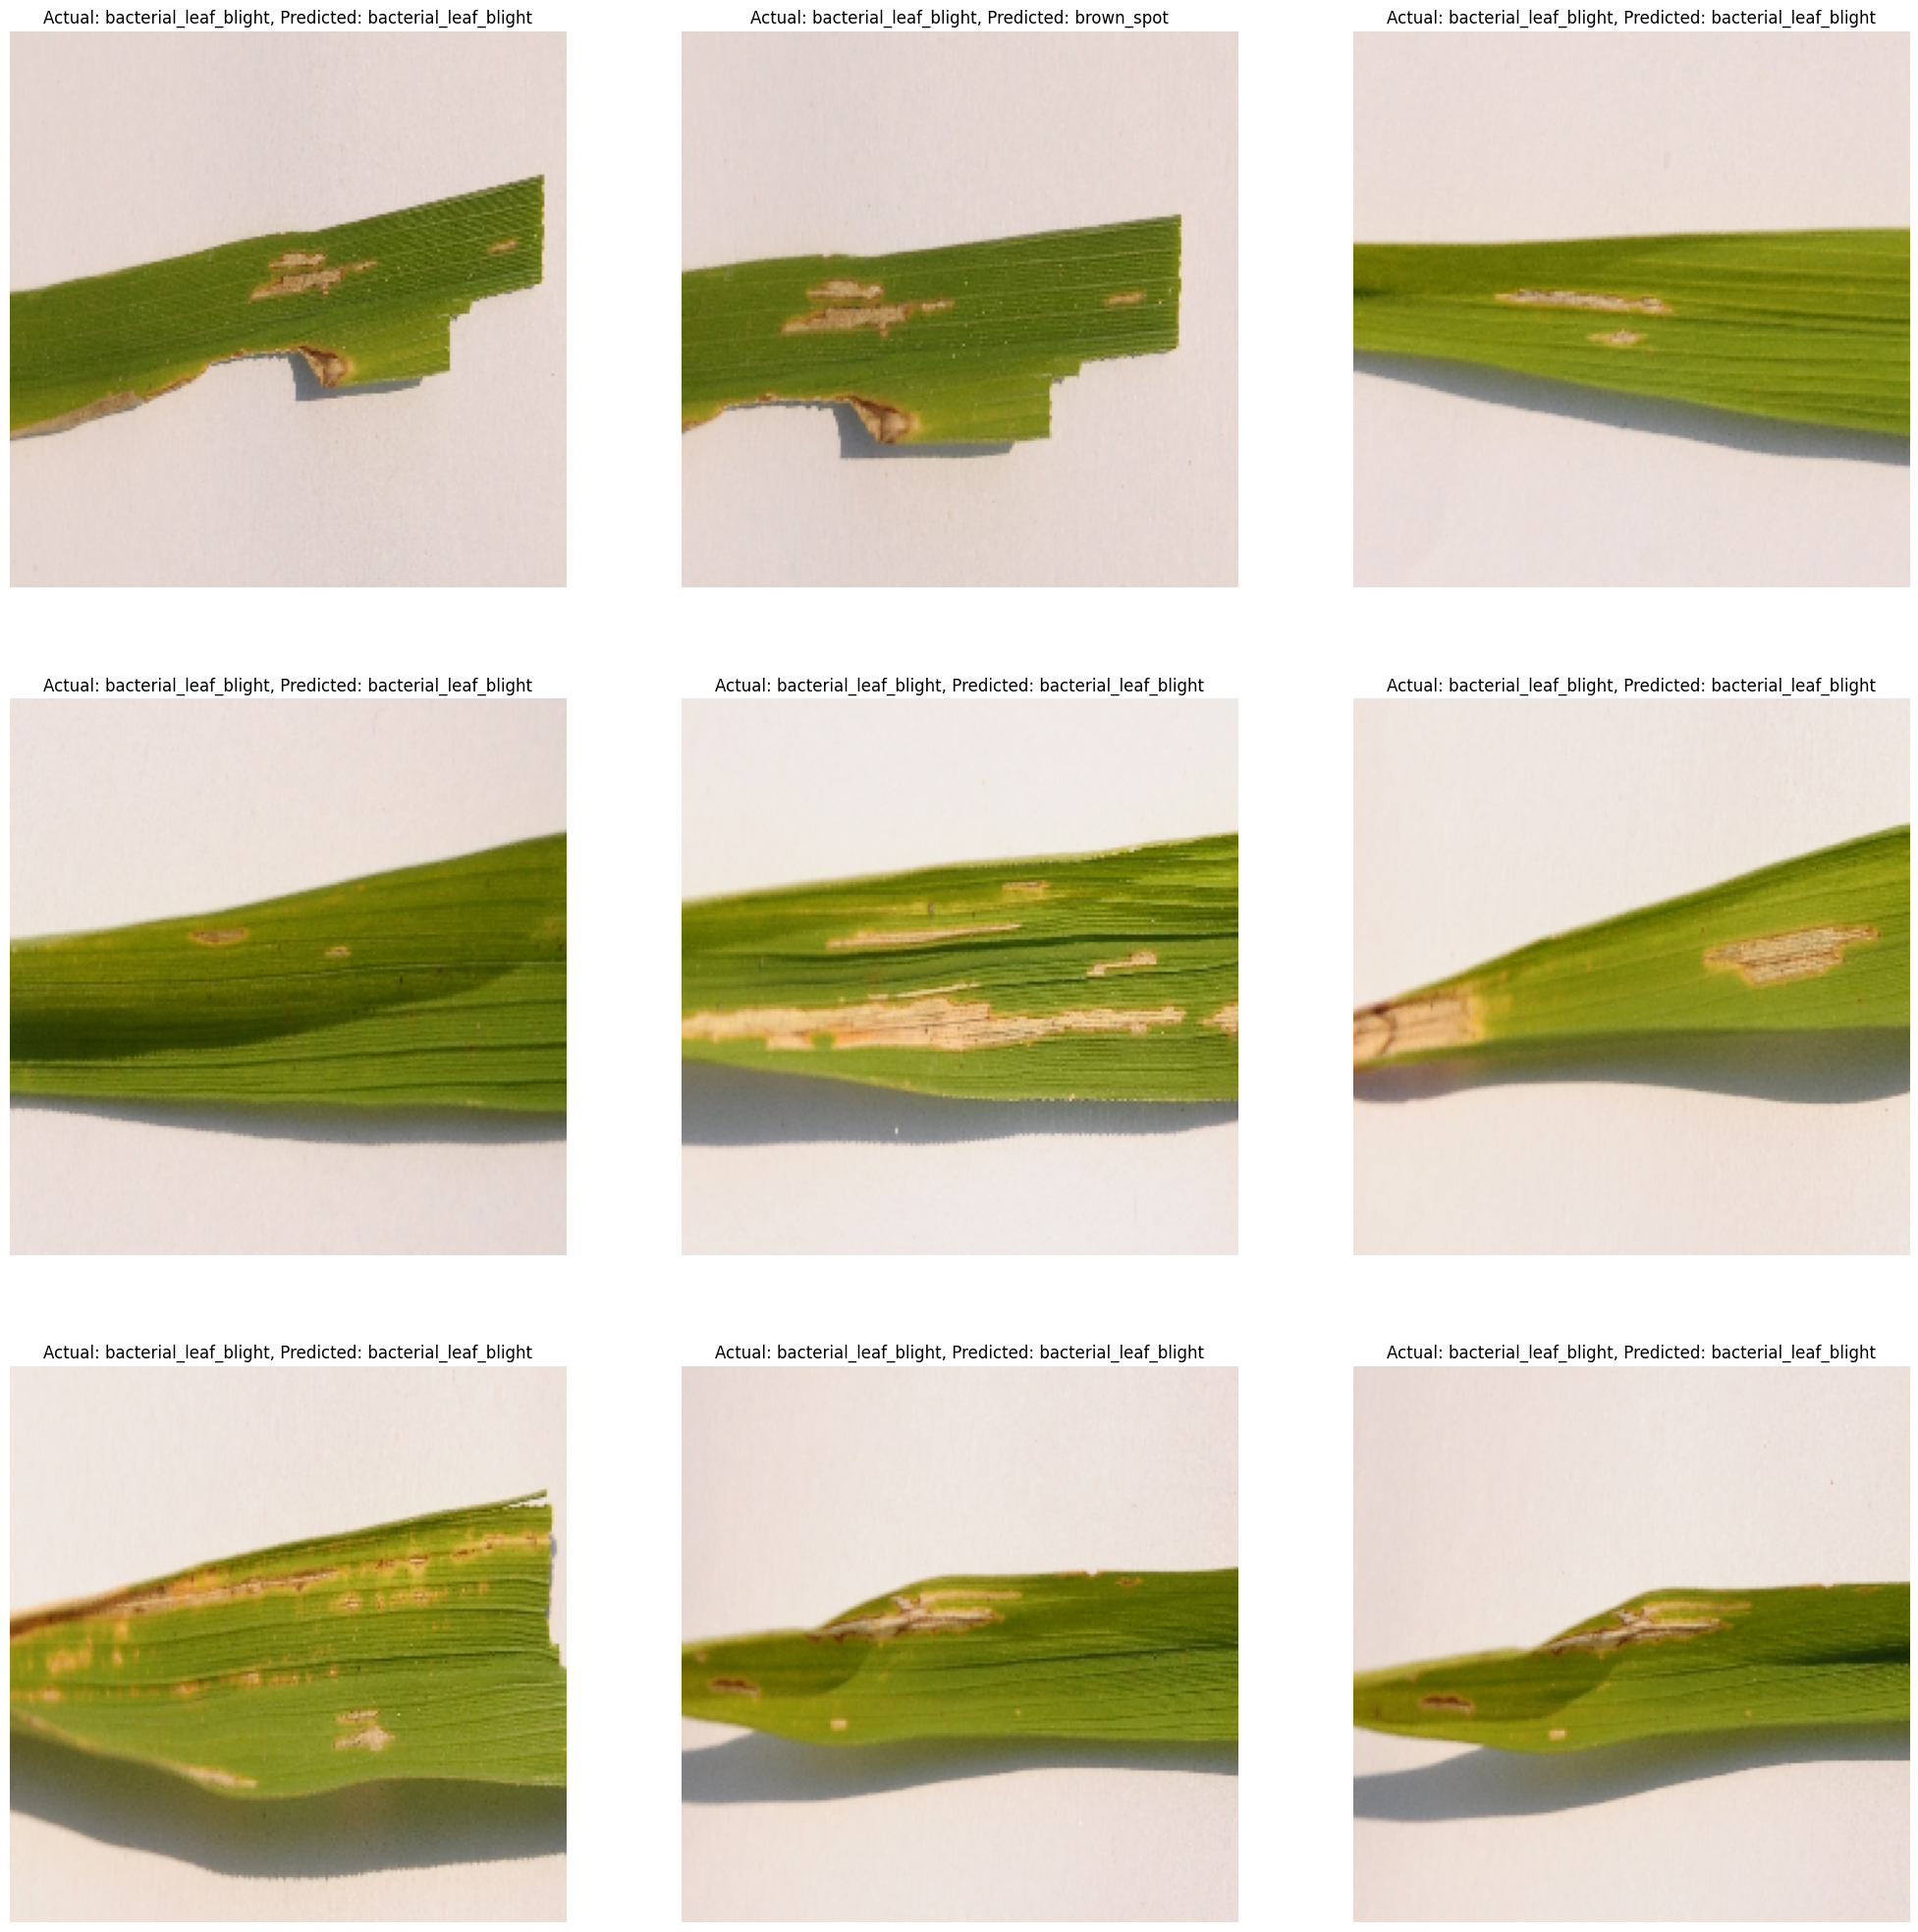

In [90]:
# Display sample predictions
plt.figure(figsize=(25, 25))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Actual: {class_labels[np.argmax(test_labels[i])]}, Predicted: {class_labels[predicted_classes[i]]}')
    plt.axis('off')
plt.show()

<h4 style="font-size: 16px;"><b>Model Prediction using External image</b></h4>

In [98]:
# Predict on custom input image
custom_img_path = '/Users/arunmani/Desktop/Datamites-Projects-master/Rice_leaf_diseases_prediction/Data/brown_spot/DSC_0101.jpg'
custom_img = image.load_img(custom_img_path, target_size=IMAGE_SIZE)
custom_img_array = image.img_to_array(custom_img)
custom_img_array = np.expand_dims(custom_img_array, axis=0)  # Add batch dimension
custom_img_array /= 255.  # Normalize pixel values

# Make prediction
custom_prediction = model.predict(custom_img_array)
custom_predicted_class = class_labels[np.argmax(custom_prediction)]
print("Custom input image predicted class:", custom_predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Custom input image predicted class: brown_spot
